In [1]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
from visualization.utils import defaultColors
from helpers import load_from_path, save_pdf

In [2]:
# from mobo.surrogate_model import BoTorchSurrogateModelReapeat, BoTorchSurrogateModel
import torch
import pandas as pd
from pathlib import Path
import numpy as np
import yaml

In [3]:
path = Path("../result/exp4d/unroll_new/marsdet/0/")
# path = Path("../result/exp/unroll_new/raqnehvi/0/")
# path = Path("../result/peaksS5R3/default/mars/0/")
# path = Path(r"..\good results\peaks\risk-averse1\qnehvi\0")
# path = Path("../result/peaks/default/qnehvi/0/")
res_dict = load_from_path(path)
approx_all_df = res_dict["approx_all_df"]
n_obj = res_dict["n_obj"]

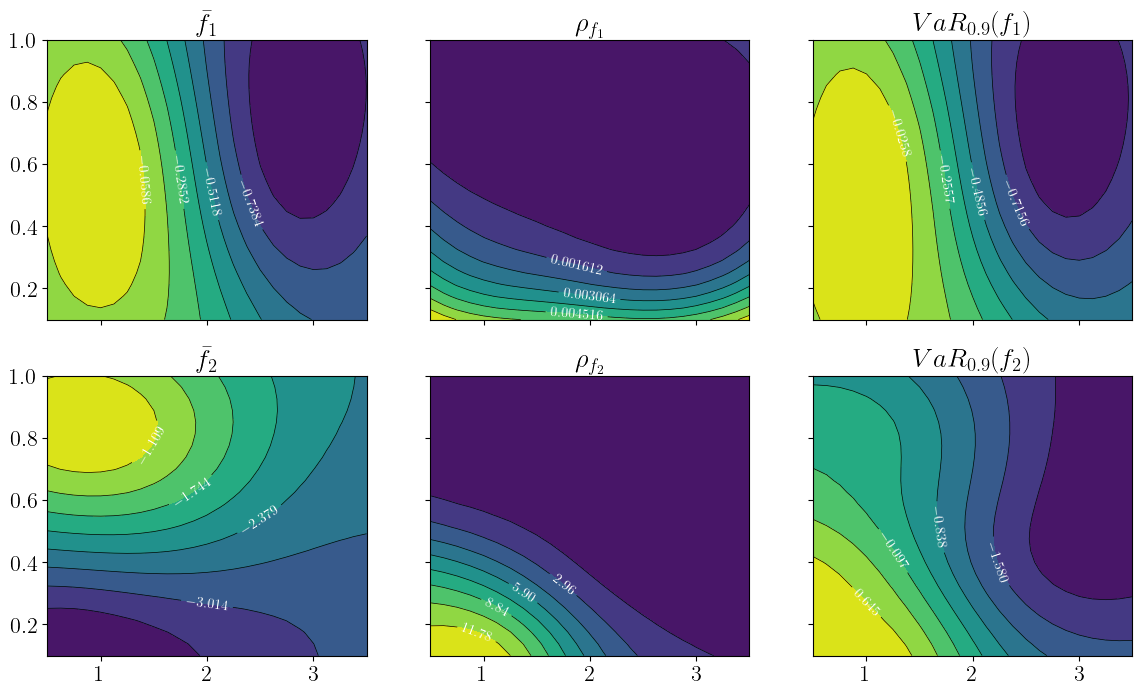

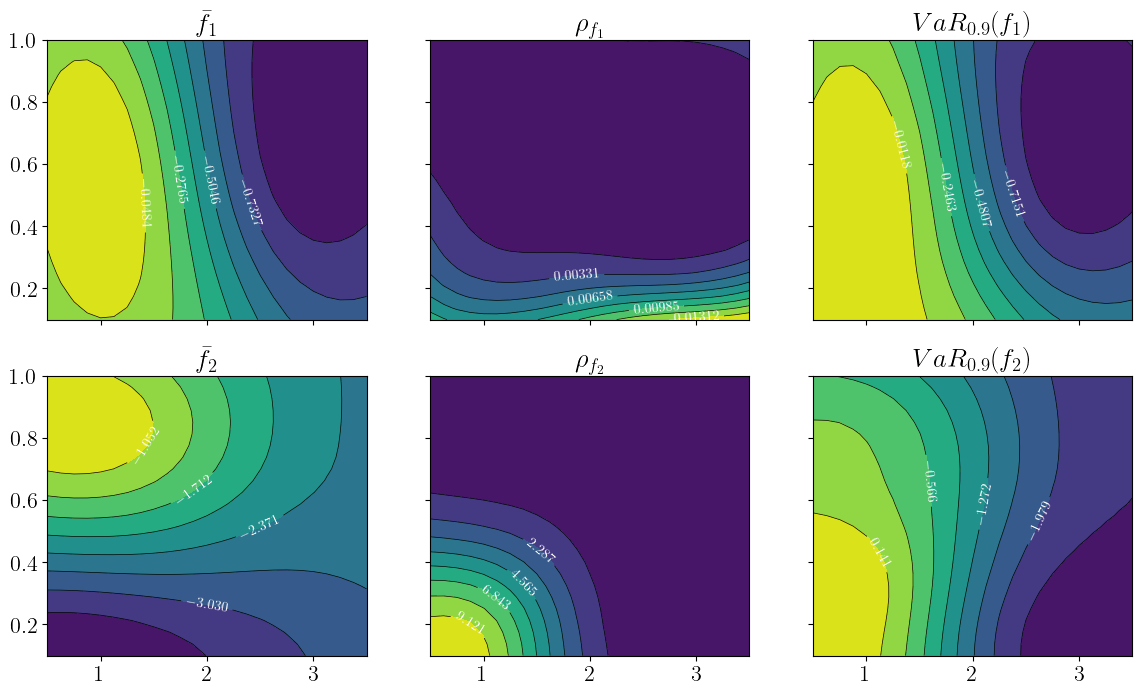

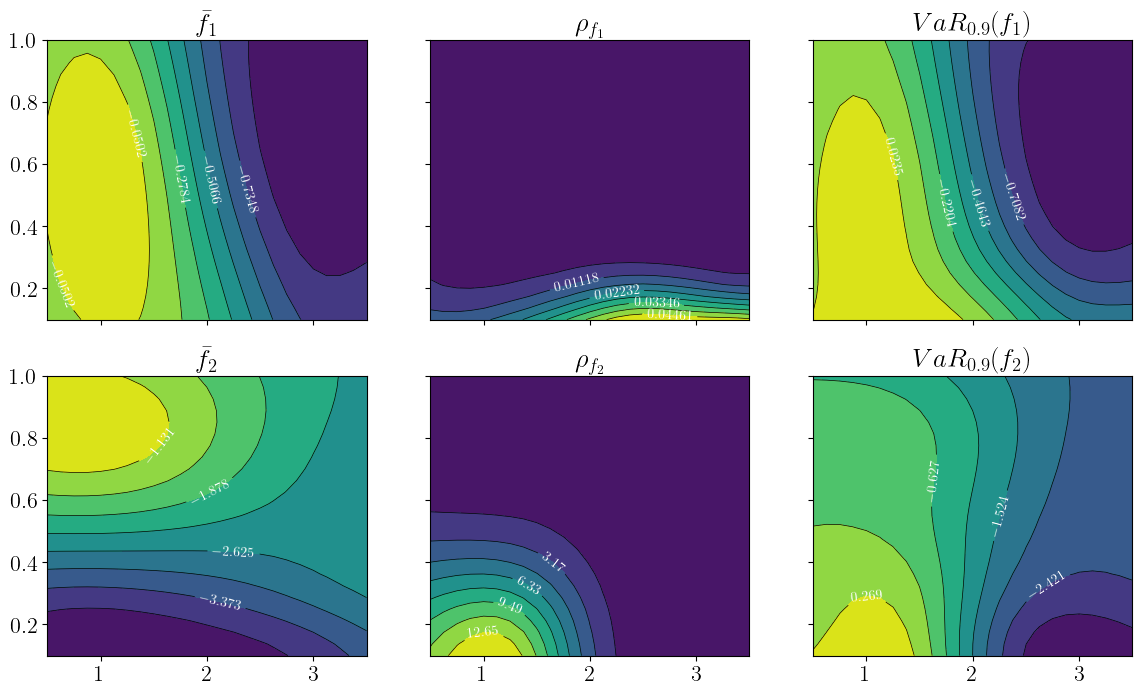

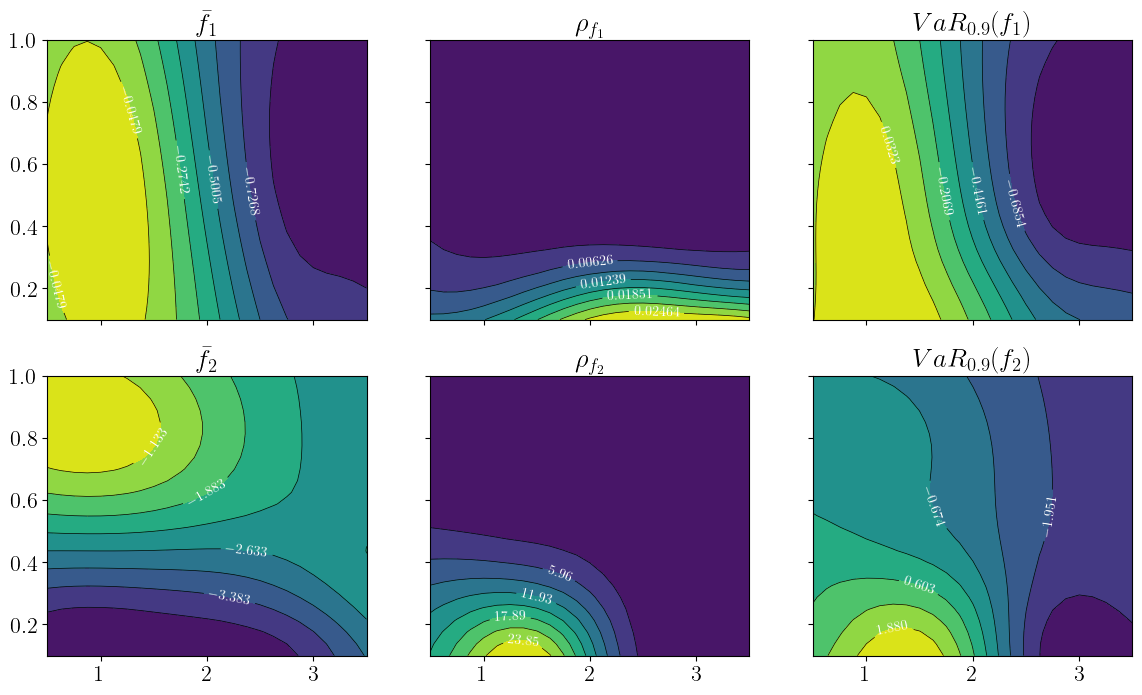

In [4]:
# %config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
    # font size
    "font.size": 16,
})

colors = defaultColors

# Assuming 'approx_all_i' is your DataFrame and 'n_grid' is defined
n_grid = 25


objective_list = list(range(1,n_obj+1))
data_keys = ["F_", "rho_F_", "mvar_F_"]

for iter in list(range(1,approx_all_df["iterID"].max()+1))[::(len(approx_all_df["iterID"].unique())-1)//3]:
    approx_all_i = approx_all_df[approx_all_df["iterID"] == iter]
    # Data reshaping
    x = approx_all_i["x1"].values.reshape((n_grid, n_grid))
    y = approx_all_i["x2"].values.reshape((n_grid, n_grid))

    fig, axs = plt.subplots(len(objective_list), len(data_keys), figsize=(14, 8))

    for i, obj_idx in enumerate(objective_list):
        for j, key in enumerate(data_keys):
            # Construct the key for the current iteration
            current_key = f"{key}{obj_idx}"
            # Reshape the data for the current plot
            z = approx_all_i[current_key].values.reshape((n_grid, n_grid))
            levels = np.linspace(z.min(), z.max(), 10)
            # Create contour plot
            img = axs[i, j].contourf(x[0], y[:, 0], z, levels=levels, cmap="viridis")
            c = axs[i, j].contour(x[0], y[:, 0], z, levels=levels, colors='black', linestyles='solid', linewidths=0.5)
            axs[i, j].clabel(c, c.levels[::2], inline=True, fontsize=10, colors='white', zorder=100)
            
            # axs[i, j].scatter(eval_samples["x1"], eval_samples["x2"], c="red", s=10, zorder=10)    
                
            # Latex formatting
            if key == "F_":
                axs[i, j].set_title(f"$\\bar{{f}}_{obj_idx}$")
            if key == "rho_F_":
                axs[i, j].set_title(f"$\\rho_{{f_{obj_idx}}}$")
            if key == "mvar_F_":
                axs[i, j].set_title(f"$VaR_{{0.9}}({{f_{obj_idx}}})$")

    # only show axis labels on the bottom row
    for ax in axs.flat:
        ax.label_outer()

    save_pdf(fig, path, "IOplotBenchmark", iter)

